In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from modules.get_df_for_preprocessing import GetDfForPreprocessing

## Local modules import

In [2]:
from modules.utility import get_csv_data
from modules.customer_behavior import get_season_df, get_perod_bf_season, get_perod_aft_season, get_day_name
from modules.create_viz import plot_purchase_behv, outliers_plot

## Read data

In [3]:
# read train data
train = get_csv_data(path='data/train.csv', version='v1')
# read test data
test = get_csv_data(path='data/test.csv', version='v1')
# read store data
store = get_csv_data(path='data/store.csv', version='v1')

Reading data from dvc source....
Reading completed, data returned
Reading data from dvc source....
Reading completed, data returned
Reading data from dvc source....
Reading completed, data returned


## Get data info

In [4]:
#training data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
#training data description
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
#test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
#test data description
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [8]:
#store data info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#store data description
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Working on date columns

In [10]:
#Convert date columns to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#get name of the day of the week
train['Day'] = train['DayOfWeek'].apply(get_day_name)
test['Day'] = test['DayOfWeek'].apply(get_day_name)

## Get season dataframes

In [11]:
# Public holidays dataframes
public_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='a')
public_holiday_bf = get_perod_bf_season(train_df=train, season_df=public_holiday, days_bf=5)
public_holiday_aft = get_perod_aft_season(train_df=train, season_df=public_holiday, days_aft=5)

2021-08-02 12:31:46,102 - Retrieving season index...
2021-08-02 12:31:46,250 - Extracting season data...
2021-08-02 12:31:46,293 - Process completed data returned.


In [12]:
# Easter holidays dataframes
easter_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='b')
easter_holiday_bf = get_perod_bf_season(train_df=train, season_df=easter_holiday, days_bf=5)
easter_holiday_aft = get_perod_aft_season(train_df=train, season_df=easter_holiday, days_aft=5)

2021-08-02 12:32:13,545 - Retrieving season index...
2021-08-02 12:32:13,665 - Extracting season data...
2021-08-02 12:32:13,746 - Process completed data returned.


In [13]:
# Christmas holidays dataframes
xmas_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='c')
xmas_holiday_bf = get_perod_bf_season(train_df=train, season_df=xmas_holiday, days_bf=5)
xmas_holiday_aft = get_perod_aft_season(train_df=train, season_df=xmas_holiday, days_aft=5)

2021-08-02 12:32:33,901 - Retrieving season index...
2021-08-02 12:32:34,009 - Extracting season data...
2021-08-02 12:32:34,051 - Process completed data returned.


## Compare purcasing behavior befpre, during and after holidays

2021-08-02 12:32:53,124 - NumExpr defaulting to 4 threads.
2021-08-02 12:32:53,539 - Plot saved as public_hol_bhv.jpg in img directory


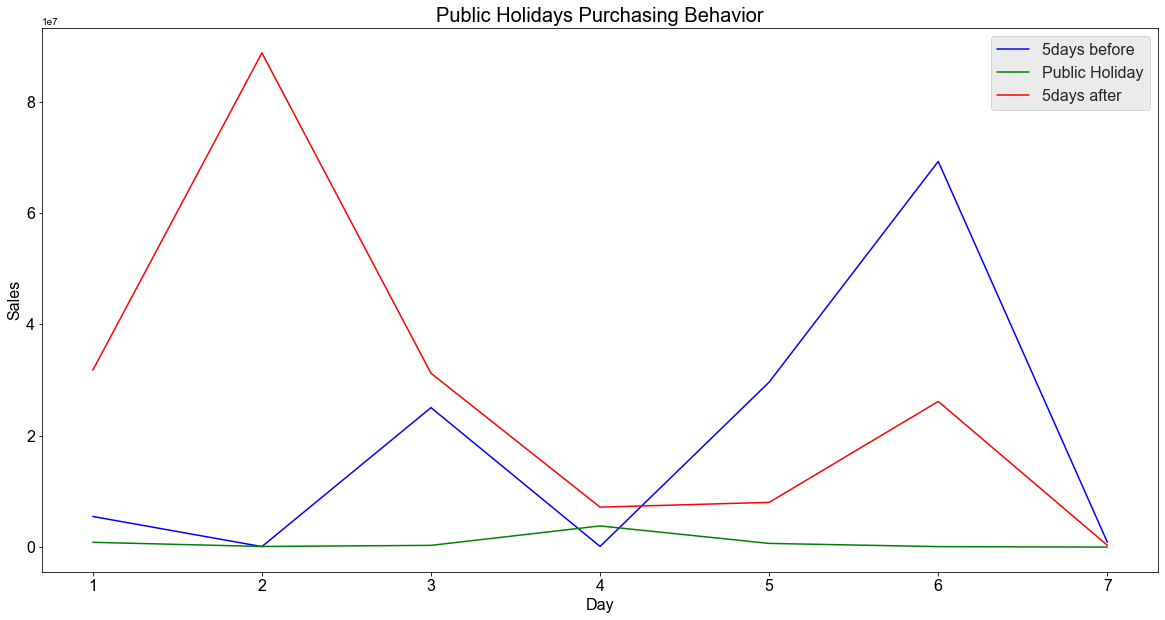

In [14]:
# Public holidays 
plot_purchase_behv(bf_df=public_holiday_bf, dur_df=public_holiday, aft_df=public_holiday_aft, title='Public Holidays Purchasing Behavior', save_path='public_hol_bhv.jpg')

2021-08-02 12:32:54,251 - Plot saved as easter_hol_bhv.jpg in img directory


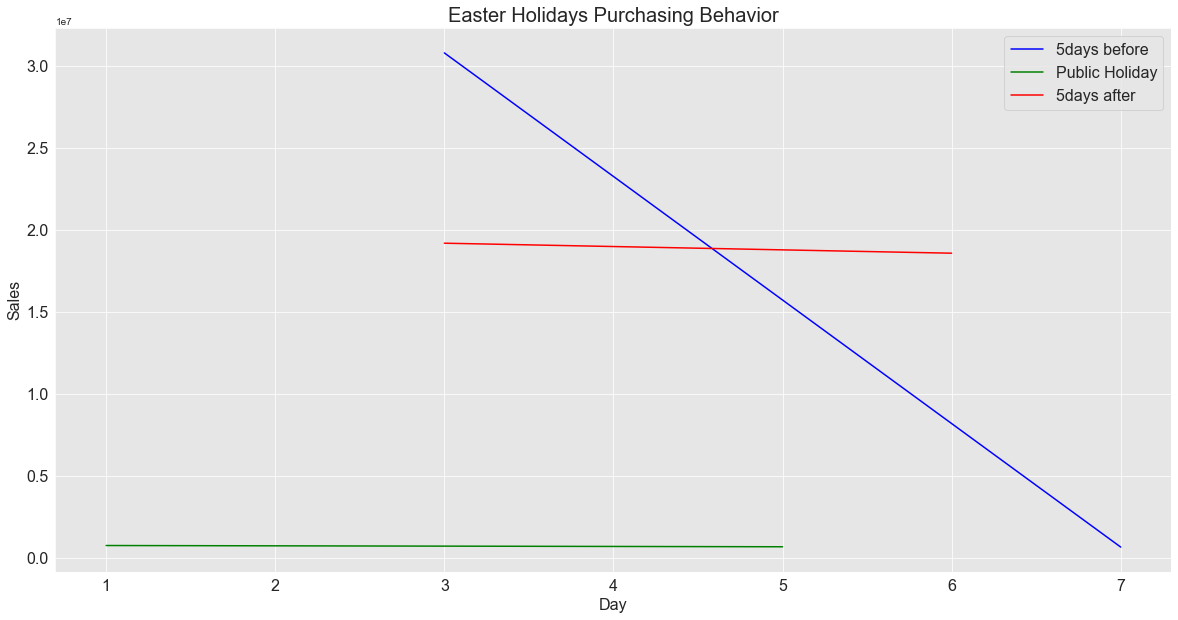

In [15]:
# Easter holidays 
plot_purchase_behv(bf_df=easter_holiday_bf, dur_df=easter_holiday, aft_df=easter_holiday_aft, title='Easter Holidays Purchasing Behavior', save_path='easter_hol_bhv.jpg')

2021-08-02 12:32:55,053 - Plot saved as christmas_hol_bhv.jpg in img directory


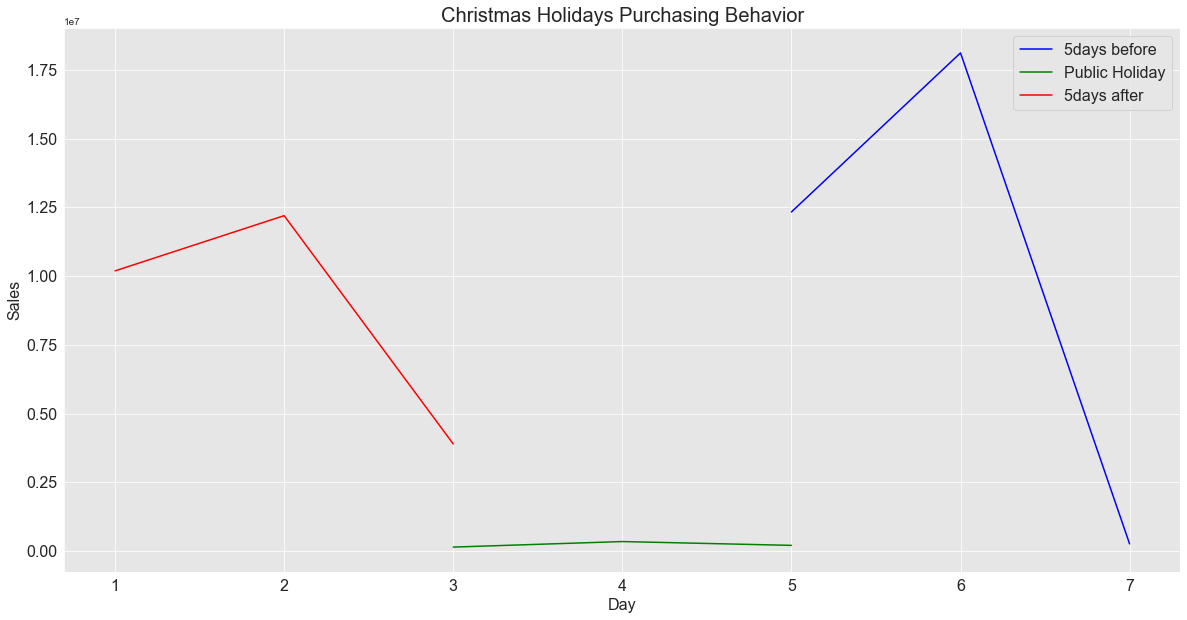

In [16]:
# Christmas holidays 
plot_purchase_behv(bf_df=xmas_holiday_bf, dur_df=xmas_holiday, aft_df=xmas_holiday_aft, title='Christmas Holidays Purchasing Behavior', save_path='christmas_hol_bhv.jpg')

## Merge training and test dataframes with store dataframe

In [17]:
# Merging store and train data set
store_train_df = store.merge(train,on=["Store"],how="inner")

In [18]:
# Merging store and test data set
store_test_df = store.merge(test,on=["Store"],how="inner")

## Getting the relationhip between features

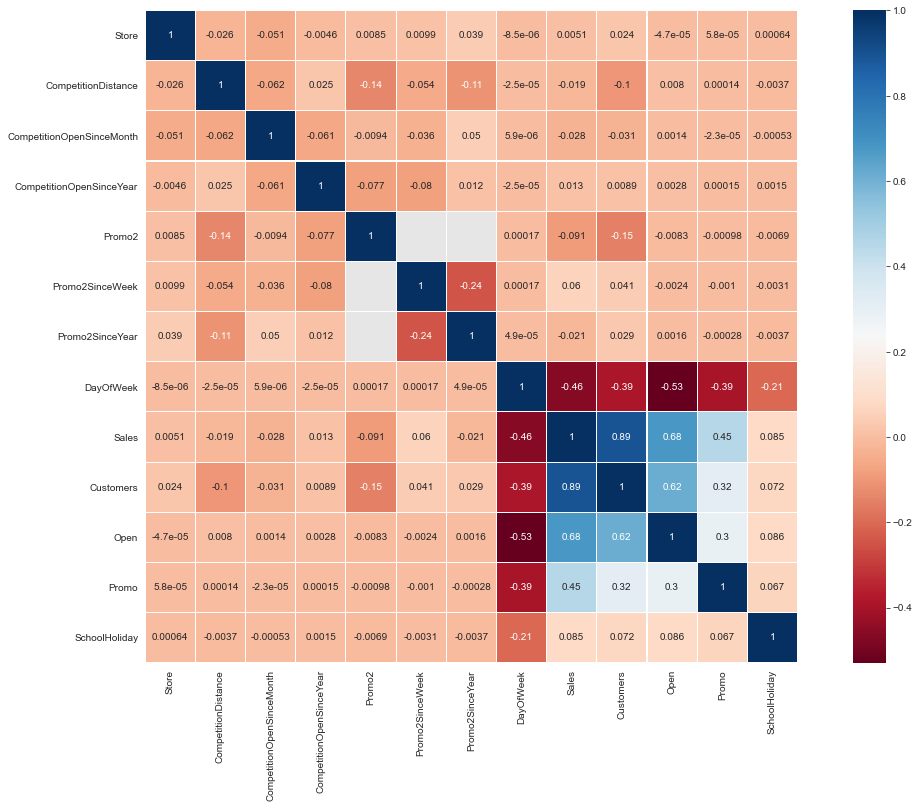

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(store_train_df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.savefig('img/corr.jpg')

## Get info and clean

In [20]:
train_prep = GetDfForPreprocessing(store_train_df)
test_prep = GetDfForPreprocessing(store_test_df)

In [21]:
train_prep.print_df_info()

Retrieving info from data...
The number of colum(s): 19.
The column(s) is/are : Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday and Day
 
The total number of rows: 1017209 
The number of columns having missing value(s): 6 
The number of rows with missing value(s) in [CompetitionDistance]: 2642
The number of rows with missing value(s) in [CompetitionOpenSinceMonth]: 323348
The number of rows with missing value(s) in [CompetitionOpenSinceYear]: 323348
The number of rows with missing value(s) in [Promo2SinceWeek]: 508031
The number of rows with missing value(s) in [Promo2SinceYear]: 508031
The number of rows with missing value(s) in [PromoInterval]: 508031


In [22]:
test_prep.print_df_info()

Retrieving info from data...
The number of colum(s): 18.
The column(s) is/are : Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Id, DayOfWeek, Date, Open, Promo, StateHoliday and Day
 
The total number of rows: 41088 
The number of columns having missing value(s): 7 
The number of rows with missing value(s) in [CompetitionDistance]: 96
The number of rows with missing value(s) in [CompetitionOpenSinceMonth]: 15216
The number of rows with missing value(s) in [CompetitionOpenSinceYear]: 15216
The number of rows with missing value(s) in [Promo2SinceWeek]: 17232
The number of rows with missing value(s) in [Promo2SinceYear]: 17232
The number of rows with missing value(s) in [PromoInterval]: 17232
The number of rows with missing value(s) in [Open]: 11


In [23]:
train_prep.drop_cols_abv_na_trshld(threshold = 0.35)


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

The column(s) to be excluded is/are [[]]

Dropping columns with missing values above the threshold ...

Dropping columns completed

Removing dropped columns from memory...

Removal of dropped columns from memory completed


In [24]:
test_prep.drop_cols_abv_na_trshld(threshold = 0.35, exclude = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'])


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

The column(s) to be excluded is/are [['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]

Dropping columns with missing values above the threshold ...

Dropping columns completed

Removing dropped columns from memory...

Removal of dropped columns from memory completed


In [25]:
train_inter_clean = train_prep.fill_missing()


The colums with missing values to be filled are ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

The column(s) to be excluded is/are ['CompetitionOpenSinceMonth']

Filling missing values in CompetitionDistance

Filling missing values in CompetitionOpenSinceYear

Filling missing values comppleted


In [26]:
test_inter_clean = test_prep.fill_missing()


The colums with missing values to be filled are ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Open']

The column(s) to be excluded is/are ['CompetitionOpenSinceMonth']

Filling missing values in CompetitionDistance

Filling missing values in CompetitionOpenSinceYear

Filling missing values in Open

Filling missing values comppleted


In [27]:
test_inter_clean.CompetitionOpenSinceMonth = test_inter_clean.CompetitionOpenSinceMonth.ffill().bfill()

### Fill null values in CompetitionOpenSinceMonth

In [28]:
train_inter_clean.CompetitionOpenSinceMonth = train_inter_clean.CompetitionOpenSinceMonth.ffill().bfill()

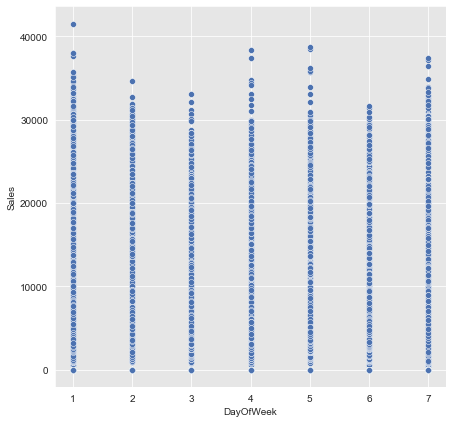

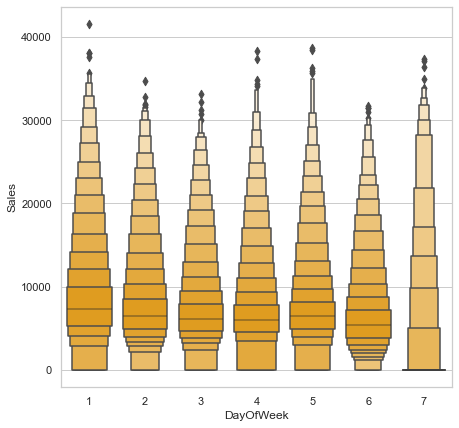

In [29]:
outliers_plot(train_inter_clean, {'x': "DayOfWeek", 'y': "Sales"}, 2)

### Remove outliers in sales

In [30]:
train_inter_clean["Sales"]=train_inter_clean["Sales"].apply(lambda x: 30000 if x>30000 else x)

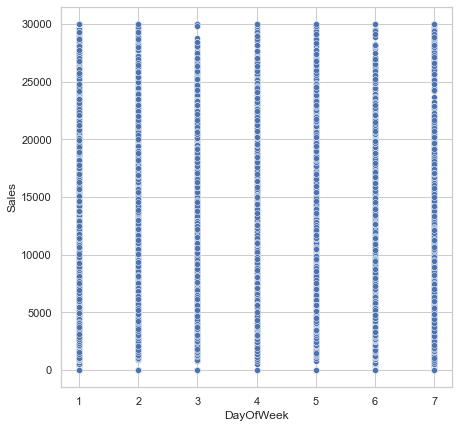

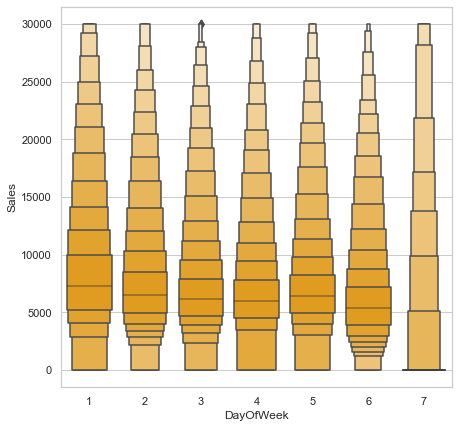

In [31]:
outliers_plot(train_inter_clean, {'x': "DayOfWeek", 'y': "Sales"}, 2)

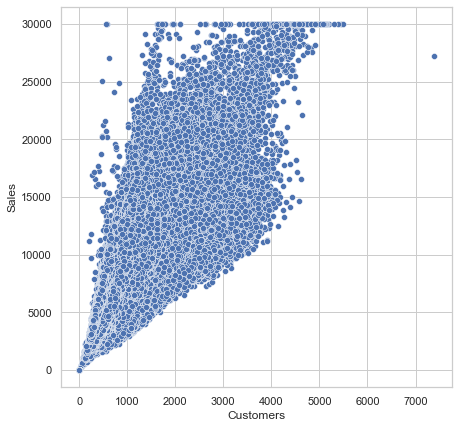

In [32]:
outliers_plot(train_inter_clean, {'x': "Customers", 'y': "Sales"}, 0)

### Remove outliers in customers

In [33]:
train_inter_clean["Customers"]=train_inter_clean["Customers"].apply(lambda x: 5000 if x>5000 else x)

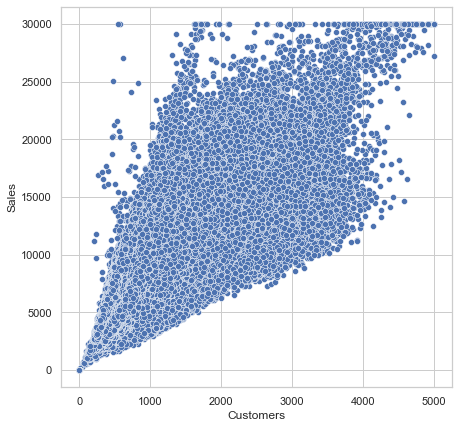

In [34]:
outliers_plot(train_inter_clean, {'x': "Customers", 'y': "Sales"}, 0)

In [35]:
from modules.prep_data_for_model import get_target, PrepareForModel

In [36]:
prep_d = PrepareForModel(df=train_inter_clean)

In [37]:
train, test, val = prep_d.split(train = 0.7, test=0.3, validation=0)

Spliting data into train, test, and validation sets...
Spliting data into train, test, and validation sets completed. The data is returned in the order of:
train_df, test_df, val_df


In [38]:
train_d,train_t = get_target(df=train, target_col='Sales')
test_d,test_t = get_target(df=test, target_col='Sales')

Retrieving the target variable...
Retrievial of the target variable completed. The data is returned in the order of:
data, target
Retrieving the target variable...
Retrievial of the target variable completed. The data is returned in the order of:
data, target


In [39]:
from sklearn.pipeline import Pipeline
from modules.xgboost_modeller import XgModeller
from modules.date_handler import DateExtract
from modules.treat_categorical import EncodeCategorical

In [40]:
d_handler = DateExtract(train_d)
d_handler.get_year()
d_handler.get_month()
d_handler.get_week_month()
d_handler.get_season()
d_handler.get_day()
d_handler.get_weekdays()
d_handler.get_weekends()
d_handler.get_month_begining()
d_handler.get_month_mid()
d_handler.get_month_end()

train_df = d_handler.return_df()

2021-08-02 12:33:26,628 - DateExtraction initialized...
2021-08-02 12:33:26,691 - Retrieving year from date...
2021-08-02 12:33:26,846 - Retrieval of year completed
2021-08-02 12:33:26,848 - Retrieving month from date...
2021-08-02 12:33:26,997 - Retrieval of month completed
2021-08-02 12:33:26,997 - Retrieving week of the month from date...
2021-08-02 12:33:27,206 - Retrieval of week of the month completed
2021-08-02 12:33:27,206 - Retrieving seasons from date...
2021-08-02 12:33:27,496 - Retrieval of seasons from date completed
2021-08-02 12:33:27,498 - Retrieving day from date...
2021-08-02 12:33:27,692 - Retrieval of day completed
2021-08-02 12:33:27,694 - Retrieving weekdays from date...
2021-08-02 12:33:28,171 - Retrieval of weekdays from date completed
2021-08-02 12:33:28,202 - Retrieving weekends from date...
2021-08-02 12:33:28,687 - Retrieval of weekends from date completed
2021-08-02 12:33:28,717 - Retrieving begining of month from date...
2021-08-02 12:33:29,148 - Retrieval

In [41]:
d_handler = DateExtract(test_d)
d_handler.get_year()
d_handler.get_month()
d_handler.get_week_month()
d_handler.get_season()
d_handler.get_day()
d_handler.get_weekdays()
d_handler.get_weekends()
d_handler.get_month_begining()
d_handler.get_month_mid()
d_handler.get_month_end()

test_df = d_handler.return_df()

2021-08-02 12:33:30,340 - DateExtraction initialized...
2021-08-02 12:33:30,431 - Retrieving year from date...
2021-08-02 12:33:30,516 - Retrieval of year completed
2021-08-02 12:33:30,518 - Retrieving month from date...
2021-08-02 12:33:30,604 - Retrieval of month completed
2021-08-02 12:33:30,607 - Retrieving week of the month from date...
2021-08-02 12:33:30,710 - Retrieval of week of the month completed
2021-08-02 12:33:30,712 - Retrieving seasons from date...
2021-08-02 12:33:30,835 - Retrieval of seasons from date completed
2021-08-02 12:33:30,836 - Retrieving day from date...
2021-08-02 12:33:30,938 - Retrieval of day completed
2021-08-02 12:33:30,940 - Retrieving weekdays from date...
2021-08-02 12:33:31,167 - Retrieval of weekdays from date completed
2021-08-02 12:33:31,181 - Retrieving weekends from date...
2021-08-02 12:33:31,379 - Retrieval of weekends from date completed
2021-08-02 12:33:31,391 - Retrieving begining of month from date...
2021-08-02 12:33:31,616 - Retrieval

In [42]:
train_df.drop(columns=['Date'], inplace=True)
test_df.drop(columns=['Date'], inplace=True)

In [43]:
en_cats = EncodeCategorical(df=train_df)
en_cats.get_cat_cols()
train_all_num_df = en_cats.encode_cats()

2021-08-02 12:33:32,553 - EncodeCategorical initialized...
2021-08-02 12:33:32,622 - Retrieving categorical columns from Dataframe...
2021-08-02 12:33:32,740 - Retrieval of categorical columns from Dataframe completed
2021-08-02 12:33:32,764 - Encoding categorical columns from Dataframe...
2021-08-02 12:33:32,818 - Encoding StoreType column...
2021-08-02 12:33:32,927 - Encoding Assortment column...
2021-08-02 12:33:33,023 - Encoding StateHoliday column...
2021-08-02 12:33:33,117 - Encoding Season column...
2021-08-02 12:33:33,221 - Encoding categorical columns from Dataframe completed


In [44]:
en_cats = EncodeCategorical(df=test_df)
en_cats.get_cat_cols()
test_all_num_df = en_cats.encode_cats()

2021-08-02 12:33:33,234 - EncodeCategorical initialized...
2021-08-02 12:33:33,287 - Retrieving categorical columns from Dataframe...
2021-08-02 12:33:33,331 - Retrieval of categorical columns from Dataframe completed
2021-08-02 12:33:33,346 - Encoding categorical columns from Dataframe...
2021-08-02 12:33:33,359 - Encoding StoreType column...
2021-08-02 12:33:33,421 - Encoding Assortment column...
2021-08-02 12:33:33,467 - Encoding StateHoliday column...
2021-08-02 12:33:33,492 - Encoding Season column...
2021-08-02 12:33:33,525 - Encoding categorical columns from Dataframe completed


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [46]:
standsc = StandardScaler()

In [47]:
train_scaled_df = pd.DataFrame(standsc.fit_transform(train_all_num_df), columns=train_all_num_df.columns)
test_scaled_df = pd.DataFrame(standsc.fit_transform(test_all_num_df), columns=test_all_num_df.columns)

In [48]:
mdlr = XgModeller()

2021-08-02 12:33:36,460 - XgModeller initialized...


In [50]:
base, best = mdlr.gridsearch_model(X=train_scaled_df, Y=train_t, output=True)

2021-08-02 12:55:14,738 - Randomized+SearchCV in process, 'n_estimators'=100 ...


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   5.1s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   4.5s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=10, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   4.8s
[CV] END colsample_bytree=0.6, gamma=0.

2021-08-02 13:00:23,207 - RandomizedSearchCV in completed
2021-08-02 13:00:23,215 - Best_estimator in retrieved


In [55]:
best_params = best.get_xgb_params()

In [64]:
best.fit(train_scaled_df, train_t)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=6, nthread=6, num_parallel_tree=1,
             random_state=42, reg_alpha=0.01, reg_lambda=0.01,
             scale_pos_weight=1, seed=42, subsample=0.95, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

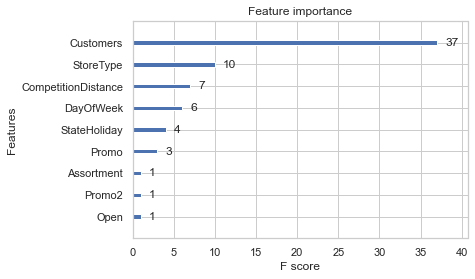

In [65]:
xgb.plot_importance(best)

2021-08-03 12:08:57,594 - Feature importance plotting in process...


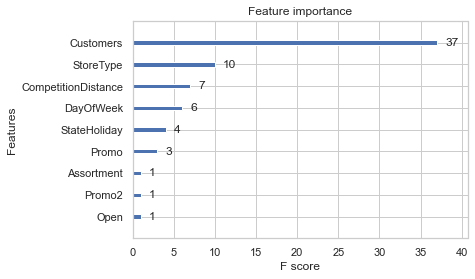

In [51]:
mdlr.best_feature_imp()

In [66]:
y_predicted = best.predict(test_scaled_df)

In [67]:
rms = mean_squared_error(test_t, y_predicted, squared=False)

In [68]:
rms

2921.9983303016097

In [69]:
y_predicted

array([7228.825 , 4372.2075, 5035.452 , ..., 3704.7197, 5533.0537,
       2509.2183], dtype=float32)

In [70]:
test_t

320731     7768
539480     5535
49580      6841
1014217    9862
899562     5444
           ... 
259178     3655
365838     7779
131932     5349
671155     7079
121958     2963
Name: Sales, Length: 305163, dtype: int64